# Feature creation - Numerical features ( Feature Transformation )

5. Reciprocal transformation

Imagine you're timing how long it takes different cars to travel a certain distance. Some cars are fast, taking only a few seconds, while others are slower and take longer.

If you were to look at just the time taken, the differences between the slower cars might seem larger than the differences between the faster cars (because the numbers are bigger).

Reciprocal transformation is like flipping the numbers over. Instead of looking at the time taken, we look at the speed (even if we don't calculate it directly). It's like saying, "Instead of how many seconds, let's think about how much of the journey they complete in one second."

Mathematically, if you have a number (like time taken), the reciprocal is 1 divided by that number (1 / time taken).

Here's a simple example with travel time (in seconds):

Let's say we have the following travel times for different cars:

1. Car A: 5 seconds (fast)
2. Car B: 10 seconds
3. Car C: 20 seconds
4. Car D: 40 seconds (slow)

Now, let's apply the reciprocal transformation (1 / time taken):

1. Reciprocal of Car A's time: 1 / 5 = 0.2
2. Reciprocal of Car B's time: 1 / 10 = 0.1
3. Reciprocal of Car C's time: 1 / 20 = 0.05
4. Reciprocal of Car D's time: 1 / 40 = 0.025

Notice what happened:

The original times had a constant difference of 5, then 10, then 20.
The reciprocals now have differences that are changing, and the faster times (smaller original numbers) now have larger reciprocal values. The difference between the "speed" of Car A (0.2) and Car B (0.1) is 0.1, while the difference between the "speed" of Car C (0.05) and Car D (0.025) is 0.025.

Why is this useful?

1. Can help with skewed data: If your data has a long tail on the right (many small values and a few very large ones, like our slow car times if we had many slow cars), the reciprocal transformation can sometimes help to reduce the skew.
2. Can linearize relationships: In some cases, the relationship between variables might be inverse (as one goes up, the other goes down in a curved way). Taking the reciprocal of one of the variables can sometimes make this relationship more linear, which is easier for some computer models to understand.
3. Focuses on rate or intensity: When the underlying concept is a rate (like speed = distance/time, or frequency = 1/period), using the reciprocal can directly represent that rate.

Important things to keep in mind:

1. Cannot be used with zero values: The reciprocal of zero is undefined (you can't divide by zero). If your data has zeros, you might need to add a small constant to all values before applying the transformation.
3. Can change the order of negative values: The reciprocal of a larger negative number is a smaller negative number (e.g., 1/-2 is -0.5, which is greater than 1/-10 = -0.1).

In simple terms, reciprocal transformation is like looking at the "opposite" of your data. Instead of focusing on the size of a value, you focus on its inverse. This can be helpful for understanding rates, dealing with certain types of skewed data, and making relationships between variables more straightforward for analysis. It's like flipping a problem on its head to see if it looks clearer from a different angle.

# 1. Import necessary libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create dataset

In [133]:
# 1. Real-life Example: Time Taken for Delivery (in minutes)

# Imagine you have data on the time taken for different delivery orders.
# Faster deliveries take less time (smaller values), while slower ones take more.

delivery_times = [
    5, 7, 6, 8, 9, 4, 10, 12, 7, 6,
    8, 9, 5, 11, 7, 6, 13, 15, 8, 7,
    # Imagine more delivery times, mostly under 15 minutes
]

# 3. Add skewed datapoints to the dataset

In [134]:
# Let's add some slower deliveries (longer times) to create skewness
delivery_times += [20, 25, 30, 35, 40]

In [135]:
# Create a Pandas Series
delivery_times_original = pd.Series(delivery_times + list(np.random.randint(10, 80, 90)) + list(np.random.randint(80, 300, 10)),name='Original Delivery Times')

# 4. Visualize the Population Density

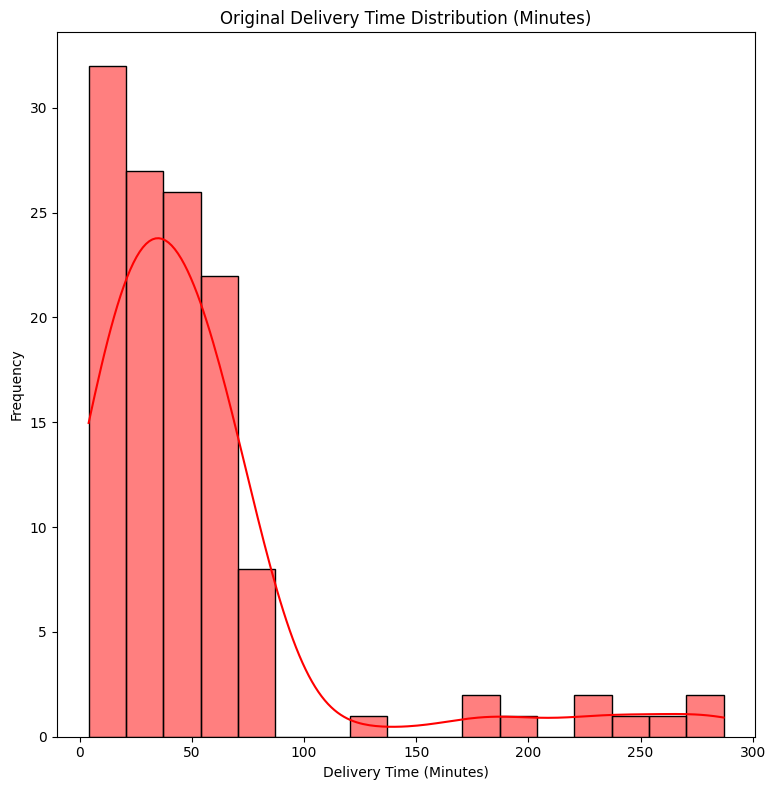

In [136]:
# Visualize the original distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.histplot(delivery_times_original, kde=True , color='Red')
plt.title('Original Delivery Time Distribution (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The original delivery time distribution is positively skewed, indicating that most deliveries take a shorter amount of time, with a tail extending towards longer delivery times.

# 5. Feature transformation using Reciprocal transformation

In [137]:
# Apply Reciprocal Transformation (1 / x)
# Be careful with zero values - we don't have any here, but in real data, you might need to handle them.
delivery_speed = 1 / delivery_times_original

In [138]:
reciprocal_delivery_speed = pd.Series(delivery_speed, name='reciprocal delivery speed')

# 6. Visualize the reciprocal transformed feature

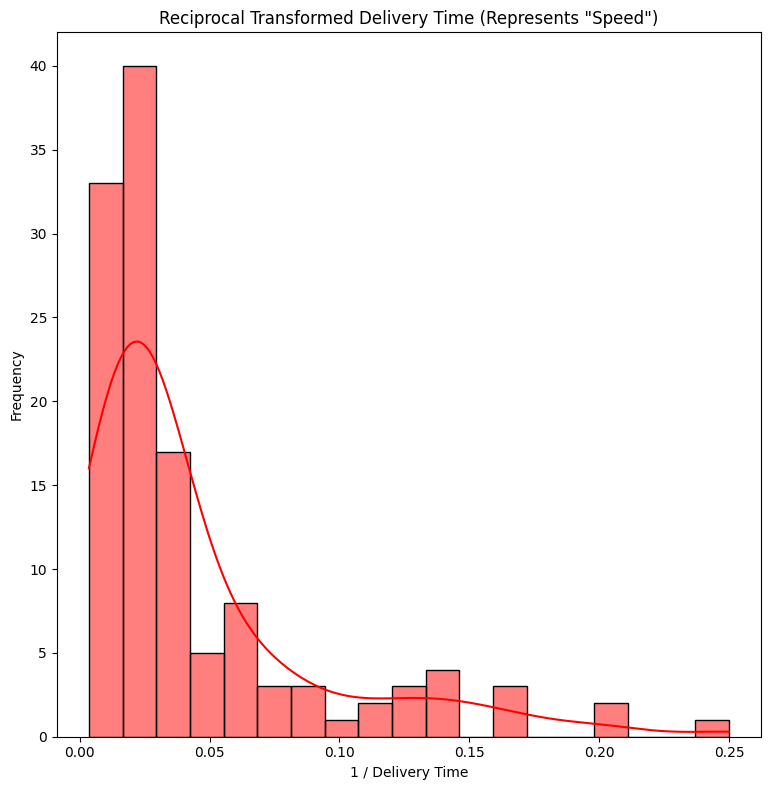

In [139]:
# Visualize the transformed distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
sns.histplot(reciprocal_delivery_speed, kde=True , color='Red')
plt.title('Reciprocal Transformed Delivery Time (Represents "Speed")')
plt.xlabel('1 / Delivery Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Inference : The reciprocal transformed delivery time distribution, representing "speed," is positively skewed, indicating a higher frequency of lower speeds (longer delivery times) and a tail extending towards higher speeds (shorter delivery times).

Mathematical Form: y' = 1/y

When to Use:

Strong Right Skew: Useful for severely right-skewed data where the log transformation might not be sufficient.

Relationships Where the Effect Diminishes: If the impact of a variable decreases as its value increases, a reciprocal transformation can help linearize the relationship (e.g., the relationship between speed and travel time).

How it Helps:

Drastic Reduction in Right Skewness: Pulls the long tail in very aggressively.
Linearizing Certain Non-Linear Relationships: Can make inverse relationships more linear.

Important Considerations:

1. Non-Zero Data: Cannot be applied to data containing zero values.
2. Change in Order: The order of the data is reversed after the transformation (larger values become smaller, and vice versa). This needs to be considered during interpretation.

Interpretation: Interpretation can be challenging as the units of the transformed variable are the inverse of the original units.

# 7. Comparing the 2 columns

In [140]:
# Create DataFrame using pd.concat()
df_concat = pd.concat([delivery_times_original, reciprocal_delivery_speed], axis=1 )
df_concat

,Original Delivery Times,reciprocal delivery speed
0,5,0.200000
1,7,0.142857
2,6,0.166667
3,8,0.125000
4,9,0.111111
...,...,...
120,189,0.005291
121,129,0.007752
122,230,0.004348
123,287,0.003484


So while considering in a model we should consider the 'reciprocal delivery speed' column